# Phase 1 Project

## Introduction

Congratulations on completing phase 1! In this notebook, you will complete a final project that applies your python and visualization skills to real word business data. 

## Objectives 
In this project, you will...
- Read in data that has been stored as a `json` file.
- Describe how the data is structured.
- Use Python to filter a nested data structure
- Define python functions
- Calculate descriptive statistics
- Visualize data via matplotlib


# Task: Compare New York Pizza Restaurants with Above Average and Below Average Ratings
![Pizza gif](https://media.giphy.com/media/eK1eFdpj5kMWqZ9bLJ/giphy.gif?cid=ecf05e47rkbp48nwz3za6dloo8xfwzueu0rx2vklguo7xyhu&rid=giphy.gif&ct=g)

## Business Understanding 

A client at your analytics firm is considering opening a pizza restaurant in New York City. 

They have asked you to develop a business intelligence report to fact check the following claims:
1. Your client wants to ensure they have an above average Yelp rating. They have previously owned restuarants in other cities, where a `3` was the average. They would like to know if that holds true in New York City. 
1. Your client has noticed that restaurants on yelp with a high review count seem to be quite successful. They have decided to focus on maximizing their review count which they believe will allow them to have an above average overall review. 
1. After looking at a few restaurants on Yelp, your client believes that most above average restaurants have a price point of `$$`. They are considering increasing their prices from `$` to `$$` to match the majority of above average restaurants, and would like you to find the most common price point for above average restaurants in New York City.
1. In terms of location they have been told that above average restaurants are usually further east and below average are usually further west, but that the biggest difference is whether the restaurant is on the north or south side. They would like you to determine if the data supports this claim.
1. They believe that the `10012` zipcode in New York City is the best place to open a restaurant. They wish to open a restaurant in close proximity to other highly rated restaurants, and they believe `10012` has the most in NYC.



The primary purpose of this analysis is _descriptive_, meaning your analysis should report calculated statistics such as `counts` and `mean`, and should be focused on providing a simple, factual, understanding of the data. 


## Data Understanding

You have been provided a Yelp dataset containing information about restaurants in New York City. The data is named `pizza_businesses.json` and is stored in the current working directory. You will need to load in this dataset, inspect how the data is structured, and use the provided information to fact check your client's claims. 

## Load the data

A dataset containing information about New York pizza restaurants is stored in this notebook's repository with the name `pizza_businesses.json`.

In the cell below, load the json data into a python dictionary.

In [1]:
#Added code line
! ls

CONTRIBUTING.md    index_files	LICENSE.md	       README_files
index-Copy1.ipynb  index.ipynb	pizza_businesses.json  README.md


In [2]:
# Replaced the code to import the json python package
import json

json.load

# Load in the data
with open('pizza_businesses.json') as f:
    data = json.load(f)

In [3]:
#Added code line to find out data types associated with keys and values
print(data[0].keys())
for v in data[0].values():
    print(type(v))


dict_keys(['name', 'review_count', 'rating', 'price', 'location', 'transactions', 'phone', 'latitude', 'longitude'])
<class 'str'>
<class 'int'>
<class 'float'>
<class 'str'>
<class 'dict'>
<class 'list'>
<class 'str'>
<class 'float'>
<class 'float'>


In [4]:
#Added code line to explore the dataset further
print("The data type of this file is :", type(data)) # the data is a list
print()
print("The data type of a single observation is:", type(data[0]))
print()
print("The length of this file is:", len(data))
print()
print("An example of the contents of this file is:", list(data)[0])
print()
print("The first restaurant record is for: ",(data[0]['name']))
print()
print("The first restaurant rating record is: ",(data[0]['rating']))
print()
print("The last restaurant record is for: ",(data[-1]['name']))
print()
print("The last restaurant rating record is: ",(data[-1]['rating']))


The data type of this file is : <class 'list'>

The data type of a single observation is: <class 'dict'>

The length of this file is: 1000

An example of the contents of this file is: {'name': 'Prince Street Pizza', 'review_count': 3976, 'rating': 4.5, 'price': '\\$', 'location': {'address1': '27 Prince St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10012', 'country': 'US', 'state': 'NY', 'display_address': ['27 Prince St', 'New York, NY 10012']}, 'transactions': ['delivery', 'pickup'], 'phone': '+12129664100', 'latitude': 40.72308755605564, 'longitude': -73.99453001177575}

The first restaurant record is for:  Prince Street Pizza

The first restaurant rating record is:  4.5

The last restaurant record is for:  Aurora Soho

The last restaurant rating record is:  4.0


Analysis (Gill): 

The pizza_businesses.json file has been converted to Python syntax and is now a list of dictionaries containing strings, integers, floats and dictionaries as values. 

There are 1000 records which appear to contain metadata regarding restaurant businesses in New York including name, address, count of reviews, ratings, price, different types of services offered, phone number and location co-ordinates. 


## Describe the data

Now that you've loaded in the dataset, the structure of the data should be inspected.

In the cell below, evaluate 
- The datatype of the overall dataset
- The datatype of a single observation
- The number of observations, and then
- Isolate the first observation in the dataset

In [5]:
# Replaced the code to evaluate the data

# Find the datatype for the overall dataset
dataset_type =  type(data)
print(dataset_type)
print()

# Isolate the first observation
first_observation = list(data[0:1])
print(first_observation)
print()

# Find the datatype for the first observation
observation_type = type(data[1])
print(observation_type)
print()

# How many observations are there
num_observations = len(data)
print(num_observations)


<class 'list'>

[{'name': 'Prince Street Pizza', 'review_count': 3976, 'rating': 4.5, 'price': '\\$', 'location': {'address1': '27 Prince St', 'address2': None, 'address3': '', 'city': 'New York', 'zip_code': '10012', 'country': 'US', 'state': 'NY', 'display_address': ['27 Prince St', 'New York, NY 10012']}, 'transactions': ['delivery', 'pickup'], 'phone': '+12129664100', 'latitude': 40.72308755605564, 'longitude': -73.99453001177575}]

<class 'dict'>

1000


Run this following cell unchanged to print out descriptive information for the dataset!

In [6]:
from pprint import pprint

print(f'The dataset is a \033[1m{dataset_type}\033[0m')
print(f'The observations are a \033[1m{observation_type}\033[0m',)
print(f'There are \033[1m{num_observations} observations.\033[0m')
print('\033[1m\nThe first observation:\033[0m')
print('==========================================')
pprint(first_observation)
print('==========================================')

The dataset is a <class 'list'>
The observations are a <class 'dict'>
There are 1000 observations.

The first observation:
[{'latitude': 40.72308755605564,
  'location': {'address1': '27 Prince St',
               'address2': None,
               'address3': '',
               'city': 'New York',
               'country': 'US',
               'display_address': ['27 Prince St', 'New York, NY 10012'],
               'state': 'NY',
               'zip_code': '10012'},
  'longitude': -73.99453001177575,
  'name': 'Prince Street Pizza',
  'phone': '+12129664100',
  'price': '\\$',
  'rating': 4.5,
  'review_count': 3976,
  'transactions': ['delivery', 'pickup']}]


## Find the possible rating options. 

In the cell below, create a variable called `rating_options` that has a [set datatype](https://realpython.com/python-sets/), and is a unique collection of the possible ratings a restaurant can recieve.

In [7]:
# Create the `rating_options` variable
rating_options = []

# Loop over all of the observations in the dataset
# Isolate the rating for the restaurant
# Add the rating to the `rating_options` variable
for restaurant in data:
    rating_options.append(restaurant['rating'])
      
rating_options = set(rating_options) 

sorted(rating_options)    
    
rating_options

{1.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0}

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [8]:
assert type(rating_options) == set
assert len(rating_options) == 8
assert list(rating_options)[0] != list(rating_options)[1]

## Plot the distribution for ratings

Now that you know what rating options are available, in the cell below plot a histogram showing the distribution of ratings. 

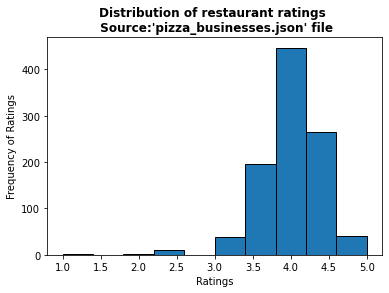

In [9]:
# Import matplotlib's pyplot module
import matplotlib.pyplot as plt

# Create an empty list.
# We will store all ratings in this list
ratings = []

# Loop over every restaurant in the dataset
# YOUR CODE HERE
    # Isolate the rating
    # YOUR CODE HERE
    # Append the rating to the `ratings` list
    # YOUR CODE HERE
for restaurant in data:
    ratings.append(restaurant['rating'])

# Create a matplotlib subplot
# YOUR CODE HERE
fig, ax = plt.subplots()

# Plot a histogram of the ratings list
# YOUR CODE HERE
ax.hist(ratings, edgecolor="black")

# Set title
ax.set_title("Distribution of restaurant ratings \n Source:'pizza_businesses.json' file", weight='bold')

# Set labels for X and Y axes
ax.set_xlabel("Ratings")
ax.set_ylabel("Frequency of Ratings");


In [10]:
#Added code line to find average of restaurant data ratings
average = sum(ratings)/len(ratings)
print("The average rating of the restaurant data ratings is:" , average)


The average rating of the restaurant data ratings is: 4.016


**Interpret the ratings histogram. How does the visualization relate to your client's claims?**

YOUR ANSWER HERE

**Analysis:**
Our clients are considering opening a pizza restaurant in New York City (NYC)and want to ensure this restaurant has an above average Yelp rating. From their previous restaurant ownership experience in other cities, they found an average rating of 3 and want to know if this holds true in NYC.

According to this data, the average rating of 3 does not hold true in NYC as the rating average according to this data is higher at 4.016. 

Of note are several lower outliers observed in this data which skews the average rate negatively and, if removed, the average will be higher than 4.016. 

**Limitations:**
The limitations of this analysis are that there is no confirmation as yet if the dataset is the best representative of NYC pizza restaurants in size or in recency of the dataset. Also, given the outliers observed the data requires further analysis.  


## Isolate the restaurants with an above average rating

Now that you have an understanding for what is an average rating, next you will isolate restaurants with above average and below average ratings so you can compare them.

In the cell below, filter out all restaurants that do not have a rating of at least `4.5`.

In [11]:
# Create an empty list
# You will store restaurants in this list
above_average = []

# Loop over the dataset
# YOUR CODE HERE
for restaurant in data:
    # Isolate the rating
    #Check if the rating is at least 4.5
    # YOUR CODE HERE
    if restaurant['rating'] >= 4.5:
        
        # If the rating is at least 4.5
        # Add the restaurant to the list
        # YOUR CODE HERE
        above_average.append(restaurant)

print(type(above_average))
print(len(above_average))
print(type(above_average[0])) 


<class 'list'>
306
<class 'dict'>


Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [12]:
assert type(above_average) == list
assert type(above_average[0]) == dict
assert len(above_average) == 306

## Isolate restaurants with a below average rating

Now repeat the process for below average ratings.

In the cell below, isolate restaurants that have a rating of no more than `3.5`.

In [13]:
# Create an empty list
# You will store restaurants in this list
below_average = []

# Loop over the restaurants in the dataset
# YOUR CODE HERE
for restaurant in data:
    
    # Isolate the rating
    # YOUR CODE HERE
    if restaurant['rating'] <= 3.5:
    
    # Check if the rating is no more than 3.5
    # YOUR CODE HERE
        below_average.append(restaurant)
    
        # If the rating no more than 3.5
        # Add the restaurant to the list
        # YOUR CODE HERE
print(type(below_average))
print(len(below_average))
print(type(below_average[0])) 


<class 'list'>
247
<class 'dict'>


Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [14]:
assert type(below_average) == list
assert type(below_average[0]) == dict
assert len(below_average) == 247

## Calculate average review counts for both groups

Now that you've isolated above average and below average restaurants, you can calculate the average number of reviews received by both groups.

To do this, you will need to isolate the review counts for both groups, and calculate their average. 

The code for isolating the review counts will look very similar to code you have previously written, which is a good sign that a function should be defined!

In the cell below, define a function called `isolate_values` that receives two arguments:
1. A list of dictionaries
2. A string indicating the key that should be isolated for each dictionary

This function should:
- Loop over every dictionary in the inputted list
- Pull out the value assigned to the inputted key
- Append the value to a new list
- Return the new list of values

In [15]:
def isolate_values(dictionaries, key):
    # Create an empty list
    # for storing data
    # YOUR CODE HERE
    values_list = []
  
    # Loop over every dictionary 
    # YOUR CODE HERE
    for dictionary in dictionaries:
        
        # Isolate the value of the dictionary with the `key`
        # YOUR CODE HERE 
        value = dictionary[key]
        # Append the value to the list
        # YOUR CODE HERE
        values_list.append(value)
                   
    # Return the list of values
    # YOUR CODE HERE
    return values_list

In [16]:
#added code to check average review count for each data group
def mean_review_count(data):
    review_counts = []
    
    for restaurant in data:
        review_counts.append(restaurant['review_count'])
          
    mean = sum(review_counts)/len(review_counts)
    return mean
  
print("The mean review count for all restaurants is:",mean_review_count(data))
print("The mean review count for the above average rating restaurants is:",mean_review_count(above_average))
print("The mean review count for the below average rating restaurants is:",mean_review_count(below_average))

The mean review count for all restaurants is: 363.771
The mean review count for the above average rating restaurants is: 189.3856209150327
The mean review count for the below average rating restaurants is: 285.99595141700405


Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [17]:
from types import FunctionType

assert type(isolate_values) == FunctionType
assert type(isolate_values([{'test': 1}], 'test')) == list
assert len(isolate_values([{'test': 1}], 'test')) == 1
assert len(isolate_values(above_average, 'name')) == len(above_average)
assert isolate_values(above_average, 'name')[-1] == above_average[-1]['name']

Now use the `isolate_values` function to create a list called `abv_avg_rev_cnts` that contains the review counts for every above average restaurant.

In [18]:
# Replace None with your code
abv_avg_rev_cnts = isolate_values(above_average, 'review_count')

print("The review count total for 'Above Average Restaurants' in the dataset is:",sum(abv_avg_rev_cnts))
print("The review count number for 'Above Average Restaurants' in the dataset is:",len(abv_avg_rev_cnts))
print("The mean review count number for 'Above Average Restaurants' in the dataset is:",sum(abv_avg_rev_cnts)/len(abv_avg_rev_cnts))
list(sorted(abv_avg_rev_cnts))

The review count total for 'Above Average Restaurants' in the dataset is: 57952
The review count number for 'Above Average Restaurants' in the dataset is: 306
The mean review count number for 'Above Average Restaurants' in the dataset is: 189.3856209150327


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 13,
 13,
 15,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 20,
 22,
 22,
 22,
 23,
 23,
 24,
 24,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 28,
 28,
 29,
 29,
 30,
 30,
 31,
 31,
 33,
 33,
 34,
 34,
 35,
 36,
 36,
 37,
 38,
 38,
 38,
 38,
 39,
 39,
 39,
 40,
 40,
 41,
 41,
 41,
 42,
 43,
 48,
 49,
 50,
 50,
 51,
 51,
 53,
 54,
 55,
 57,
 57,
 59,
 62,
 62,
 62,
 63,
 63,
 63,
 65,
 66,
 66,
 67,
 70,
 71,
 73,
 77,
 77,
 77,
 80,
 80,
 81,
 82,
 83,
 83,
 84,
 84,
 91,
 92,
 96,
 96,
 101,
 103,
 105,
 106,
 106,
 108,
 110,
 110,
 111,
 113,
 115,
 116,
 116,
 117,
 118,
 120,
 123,
 124,
 125,
 127,
 128,
 129,
 131,
 135,
 135,
 136,
 137,
 138,
 143,
 144,
 149,
 1

Now use the `isolate_values` function to create a list called `blw_avg_rev_cnts` that contains the review counts for every below average restaurant.

In [19]:
# Replace None with your code
blw_avg_rev_cnts = isolate_values(below_average, 'review_count')

print("The review count total for 'Below Average Restaurants' in the dataset is:",sum(blw_avg_rev_cnts))
print("The review count number for 'Below Average Restaurants' in the dataset is:",len(blw_avg_rev_cnts))
print("The mean review count number for 'Below Average Restaurants' in the dataset is:",sum(blw_avg_rev_cnts)/len(blw_avg_rev_cnts))
list(sorted(blw_avg_rev_cnts))

The review count total for 'Below Average Restaurants' in the dataset is: 70641
The review count number for 'Below Average Restaurants' in the dataset is: 247
The mean review count number for 'Below Average Restaurants' in the dataset is: 285.99595141700405


[1,
 2,
 3,
 3,
 4,
 4,
 5,
 6,
 7,
 7,
 7,
 8,
 8,
 9,
 9,
 10,
 13,
 14,
 15,
 19,
 20,
 20,
 20,
 20,
 21,
 22,
 23,
 24,
 27,
 32,
 33,
 33,
 35,
 36,
 36,
 36,
 37,
 39,
 39,
 44,
 47,
 49,
 53,
 54,
 54,
 56,
 56,
 57,
 57,
 57,
 60,
 62,
 64,
 64,
 65,
 69,
 71,
 73,
 74,
 75,
 76,
 77,
 77,
 77,
 78,
 78,
 78,
 79,
 79,
 81,
 84,
 84,
 88,
 90,
 91,
 91,
 94,
 95,
 98,
 100,
 103,
 105,
 107,
 109,
 109,
 110,
 111,
 114,
 116,
 117,
 119,
 121,
 127,
 127,
 127,
 127,
 129,
 130,
 130,
 130,
 132,
 132,
 134,
 136,
 136,
 138,
 142,
 144,
 145,
 146,
 146,
 147,
 148,
 150,
 153,
 155,
 156,
 158,
 162,
 163,
 163,
 164,
 168,
 168,
 170,
 174,
 176,
 178,
 179,
 182,
 184,
 187,
 189,
 191,
 191,
 191,
 198,
 205,
 211,
 212,
 219,
 228,
 231,
 231,
 234,
 236,
 237,
 240,
 241,
 243,
 246,
 247,
 247,
 249,
 255,
 256,
 257,
 263,
 264,
 266,
 267,
 270,
 271,
 277,
 279,
 280,
 286,
 287,
 288,
 289,
 291,
 292,
 294,
 296,
 302,
 308,
 311,
 316,
 317,
 318,
 320,
 322,
 3

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [20]:
assert type(abv_avg_rev_cnts) == list
assert type(abv_avg_rev_cnts[0]) == int
assert type(blw_avg_rev_cnts) == list
assert type(blw_avg_rev_cnts[0]) == int
assert len(abv_avg_rev_cnts) == len(above_average)
assert len(blw_avg_rev_cnts) == len(below_average)
assert abv_avg_rev_cnts[101] == above_average[101]['review_count']
assert blw_avg_rev_cnts[101] == below_average[101]['review_count']

Now that you've isolated the review counts for both groups, you can calculate the average review count!

But before you do that, you should inspect the distribution of review counts to make sure `mean` is an appropriate measure of centrality.

In the cell below, we plot a histogram for above average and below average restaurant review counts.

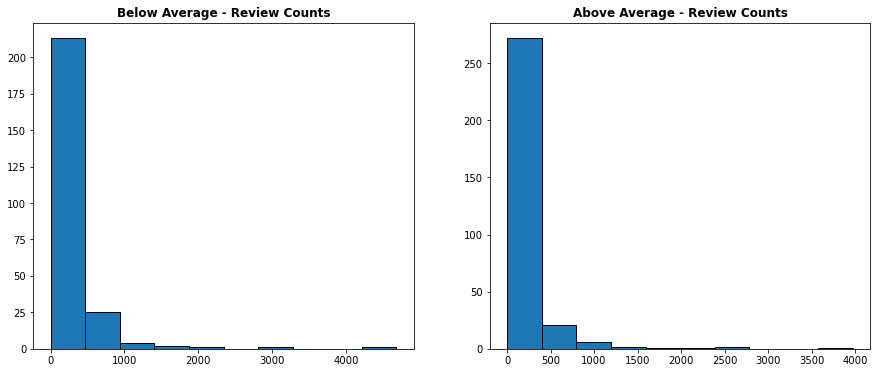

In [21]:
# Initialize a matplotlib subplot
# with 1 row and 2 columns
fig, ax = plt.subplots(1,2, figsize=(15,6))

# Plot a histogram of below average review counts
# on the first axis
ax[0].hist(blw_avg_rev_cnts, edgecolor="black")

# Set the title for the first axis
# to "Below Average - Review Counts"
ax[0].set_title("Below Average - Review Counts", weight='bold')

# Plot a histogram of above average review counts

# on the first axis
ax[1].hist(abv_avg_rev_cnts, edgecolor="black")

# Set the title for the first axis
# to "Above Average - Review Counts"
ax[1].set_title("Above Average - Review Counts", weight='bold');


**Interpret the above visualizations. What statistic is best suited for these data?**

YOUR ANSWER HERE

**Analysis:** The statistic best suited for data in the above graphs is:
- the mean review count for restaurants with below average ratings is between 0 and approximately 500; and
- the mean review count for restaurants with above average ratings is between 0 and approximately 400. 

**Limitations:** The above graphs pose difficulties for interpretation with the following observations:
- there are no labels for the x and y axes;
- the bounds of the y axes are not high enough;
- the bounds of the x axes are tightly packed so that the bulk of the data is contained within the first bar;
- the bounds' ticks for each graph are not the same; and
- the axes do not commence at the same place. 


In the cell below, calculate the average review count for above average and below average restaurants.

In [22]:
# Import numpy
# YOUR CODE HERE
import numpy as np

# Replace None with your code
abv_avg_rev_cnt_center = sum(abv_avg_rev_cnts)/len(abv_avg_rev_cnts)
blw_avg_rev_cnt_center = sum(blw_avg_rev_cnts)/len(blw_avg_rev_cnts)

print('Above average review count:', abv_avg_rev_cnt_center)
print('Below average review count:', blw_avg_rev_cnt_center)

Above average review count: 189.3856209150327
Below average review count: 285.99595141700405


**Interpret the average review count for both groups. How does this relate to your client's claims?**

YOUR ANSWER HERE

**Analysis:** Our client believes that restaurants on Yelp with a high review count seem to be quite successful. According to this data, the average review counts for the above and below average rating restaurants appear significantly different with the highest median (approximately 286 reviews) actually associated with below average rating restaurants. 

This observation does not substantiate the client's assertion and brings into question if the strategy to focus on maximizing review counts will faciliate an above average rating.

**Limitations:** The limitations associated with this analysis are:
- There are outliers in both above and below average rating data that skew the average review count upwards; and 
- The actual reviews for these restaurants have not been analysed for their relevance.  


## Count the price option frequency

The `price` variable in the dataset is a string of dollar signs indicating how expensive a restaurant's price point is. 

In the cell below, write a for loop that counts how frequently a given price point appears for the `above_average` dataset

In [23]:
# Create an empty dictionary to store the
# counts for each price point
abv_avg_prices = {}
price_key = []

# Loop over the above average restaurants
# YOUR CODE HERE
for restaurant in above_average:
           
    # Isolate the price point for the restuarant
    # YOUR CODE HERE
    price_key.append(restaurant['price'])

    # Check if the price has been added to the dictionary
    # YOUR CODE HERE

for index in price_key:
    abv_avg_prices[index] = abv_avg_prices.setdefault(index, 0) + 1
    
abv_avg_prices
    
            # If the price is already a key in the dictionary
            # Add one to the count for that price point
            # YOUR CODE HERE
            
    # If the price has not been added to the dictionary
    # Else set the price as the key and the value as the integer `1`
    # YOUR CODE HERE

{'\\$': 74, '\\$\\$': 87, 'Unknown': 134, '\\$\\$\\$': 10, '\\$\\$\\$\\$': 1}

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [24]:
assert type(abv_avg_prices) == dict
assert len(abv_avg_prices) == 5
assert '\\$\\$\\$\\$' in abv_avg_prices

**Now reapply the same process, but instead calculate the price point frequencies for the `below_average` dataset.**

In [25]:
# Create an empty dictionary to store the
# counts for each price point
blw_avg_prices = {}
price_key1 = []

# Loop over the above average restaurants
# YOUR CODE HERE
for restaurant in below_average:
           
    # Isolate the price point for the restuarant
    # YOUR CODE HERE
    price_key1.append(restaurant['price'])

    # Check if the price has been added to the dictionary
    # YOUR CODE HERE

for index in price_key1:
    blw_avg_prices[index] = blw_avg_prices.setdefault(index, 0) + 1
    
blw_avg_prices
    
            # If the price is already a key in the dictionary
            # Add one to the count for that price point
            # YOUR CODE HERE
            
    # If the price has not been added to the dictionary
    # Else set the price as the key and the value as the integer `1`
    # YOUR CODE HERE

{'\\$\\$': 88, '\\$': 128, 'Unknown': 19, '\\$\\$\\$': 12}

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [26]:
assert type(blw_avg_prices) == dict
assert len(blw_avg_prices) == 4
assert '\\$' in blw_avg_prices

## Create a bar plot that sets the frequency of each price point as the y axis

In [27]:
#Added code to put the results in order so analysis is easier in graphs below
blw_avg_prices = dict(sorted(blw_avg_prices.items(), key=lambda item: item[0]))
print(blw_avg_prices)
print(type(blw_avg_prices))

{'Unknown': 19, '\\$': 128, '\\$\\$': 88, '\\$\\$\\$': 12}
<class 'dict'>


In [28]:
#Added code to put the results in order so analysis is easier in graphs below
abv_avg_prices = dict(sorted(abv_avg_prices.items(), key=lambda item: item[0]))
print(abv_avg_prices)
print(type(abv_avg_prices))

{'Unknown': 134, '\\$': 74, '\\$\\$': 87, '\\$\\$\\$': 10, '\\$\\$\\$\\$': 1}
<class 'dict'>


dict_keys(['Unknown', '\\$', '\\$\\$', '\\$\\$\\$'])
dict_values([19, 128, 88, 12])
dict_keys(['Unknown', '\\$', '\\$\\$', '\\$\\$\\$', '\\$\\$\\$\\$'])
dict_values([134, 74, 87, 10, 1])


Text(0.5, 1.0, 'Above Average')

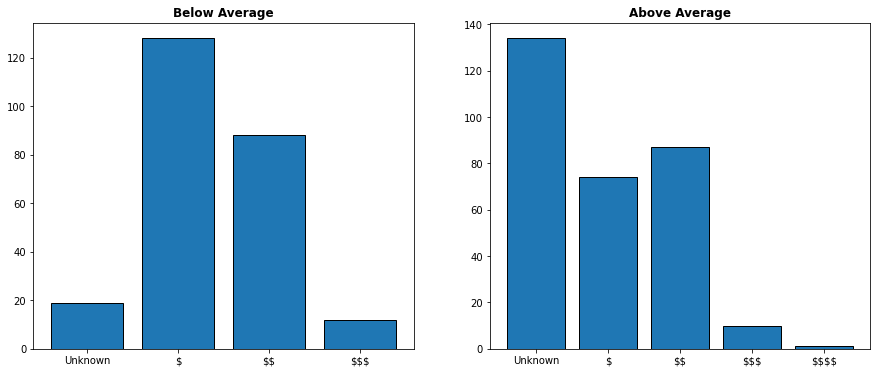

In [29]:
# Create a matplotlib subplot with 1 row and 2 columns
# YOUR CODE HERE
fig, ax = plt.subplots(1,2, figsize=(15,6))

# Isolate keys of the below average price count dictionary
# This will be the x-axis
# YOUR CODE HERE
x1axis = blw_avg_prices.keys()
print(x1axis)

# Isolate the values of the below average price count dictionary
# This will be the y-axis
# YOUR CODE HERE
y1axis = blw_avg_prices.values()
print(y1axis)

# Plot the below average price point counts as a bar plot
# on the first axis
# YOUR CODE HERE
ax[0].bar(x1axis,y1axis, edgecolor="black")

# Set the title for the first axis
# to the string "Below Average"
# YOUR CODE HERE
ax[0].set_title("Below Average", weight="bold")

# This will be the x-axis
# YOUR CODE HERE

# Isolate keys of the above average price count dictionary
# This will be the x-axis
# YOUR CODE HERE
x2axis = abv_avg_prices.keys()
print(x2axis)

# Isolate the values of the above average price count dictionary
# This will be the y-axis
# YOUR CODE HERE
y2axis = abv_avg_prices.values()
print(y2axis)

# Plot the above average price counts as a bar plot
# on the second axis
# YOUR CODE HERE
ax[1].bar(x2axis,y2axis, edgecolor="black")

# Set the title for the second axis to 
# the string 'Above Average'
# YOUR CODE HERE
ax[1].set_title("Above Average", weight="bold")


**Interpret the above visualization. How does it relate to your client's claims?**

YOUR ANSWER HERE

**Analysis:** Our client asked us to find the most common price point for above average restaurants in New York City. 
From the data in the graphs above the following observations are:

- the most common price point for above average rating restaurants is 'unknown';

- the second most common price point for above (and below average) rating restaurants is $$; and

- the third most common price point for above average rating restaurants is \\$ and closely follows the \\$$ price point.

The above observations contrast with the client's belief that most above average restaurants have the higher price point and therefore they should consider not increasing their prices to $$ as this does not match the majority of above average restaurants in this data.

**Limitations:** Further analysis of the data should be completed and perhaps further collection should take place given the significant number of 'unknown' price points.


## Analyze restaurant location

In the cell below, use the `isolate_values` function to isolate `longitude` and `latitude` for above and below average restaurants.

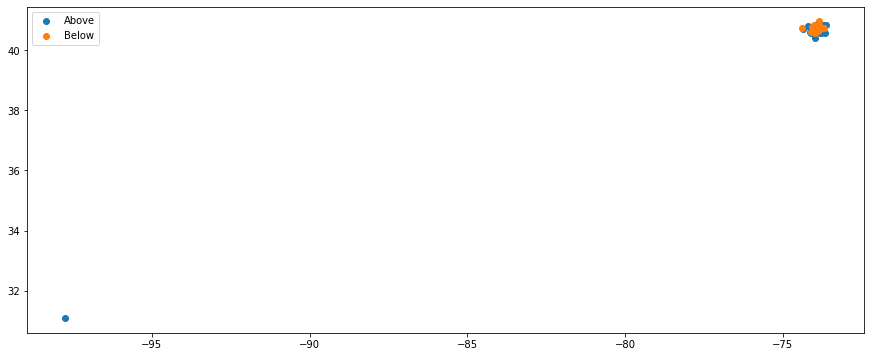

In [30]:
# Replace None with your code

# Isolate longitude for above average restaurants
abv_avg_lon = isolate_values(above_average, 'longitude')

# Isolate latitude for above average restaurants
abv_avg_lat = isolate_values(above_average, 'latitude')

# Isolate longitude for below average restaurants
blw_avg_lon = isolate_values(below_average, 'longitude')

# Isolate latitude for below average restaurants
blw_avg_lat = isolate_values(below_average, 'latitude')

plt.figure(figsize=(15,6))
plt.scatter(abv_avg_lon, abv_avg_lat, label='Above')
plt.scatter(blw_avg_lon, blw_avg_lat, label='Below')
plt.legend();

## Remove the outlier

There is one restaurant in the above average dataset with a location dramatically west and south of all other observations. Let's remove that restaurant from the above average dataset and regenerate the scatter plot.

In [31]:
#added code to ascertain the outlier identity
outlier_rest = []

for restaurant in above_average:
    if restaurant['longitude']<-90:
        outlier_rest.append(restaurant)

print(outlier_rest)    

[{'name': 'New York Pizza', 'review_count': 115, 'rating': 4.5, 'price': '\\$\\$', 'location': {'address1': '701 W Elms Rd', 'address2': 'Ste 300', 'address3': '', 'city': 'Killeen', 'zip_code': '76542', 'country': 'US', 'state': 'TX', 'display_address': ['701 W Elms Rd', 'Ste 300', 'Killeen, TX 76542']}, 'transactions': ['delivery'], 'phone': '+12542851758', 'latitude': 31.086427, 'longitude': -97.753939}]


In [32]:
# Create an empty list
# that will contain data with
# the outlier removed
no_outliers = []

# Create an empty list to append the outlier
outlier = []

# Loop over every restaurant in the above average dataset
# YOUR CODE HERE
for restaurant in above_average:
    
    # Check if the longitude value is greater than the integer -90
    # YOUR CODE HERE
           
        # Append the restaurant to the no_outliers list
        # YOUR CODE HERE
        
    # If longitude is less than -90 it is an outlier
    # and should be appended to the outlier list
    # YOUR CODE HERE
    
    # Isolate the restaurant's longitude
    # YOUR CODE HERE
    
    if restaurant['longitude']<-90:
        outlier.append(restaurant)
    
    else:
        if restaurant['longitude']>-90:
            no_outliers.append(restaurant)
    
   

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [33]:
assert type(no_outliers) == list
assert type(outlier) == list
assert len(no_outliers) == len(above_average) - 1
assert len(outlier) == 1

Now regenerate the longitude and latitude for above average restaurants using the `no_outliers` dataset, and regenerate the scatter plot!

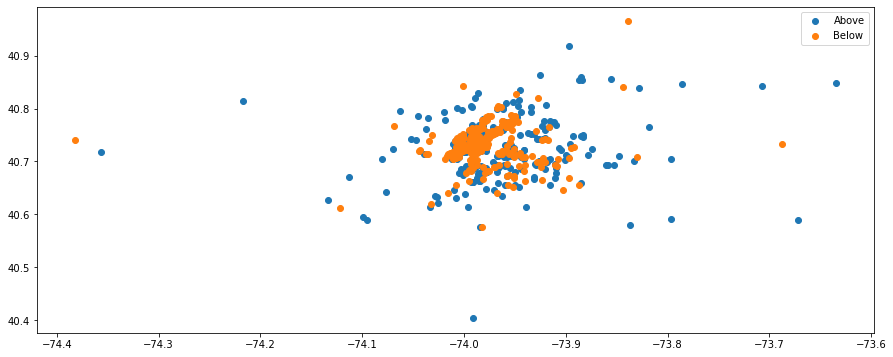

In [34]:
abv_avg_lon = isolate_values(no_outliers,'longitude')
abv_avg_lat = isolate_values(no_outliers,'latitude')

plt.figure(figsize=(15,6))
plt.scatter(abv_avg_lon, abv_avg_lat, label='Above')
plt.scatter(blw_avg_lon, blw_avg_lat, label='Below')
plt.legend();

Nice. This is much more interesting. 

## Plot the distribution of latitude and longitude

To get a better sense about how latitude and longitude are working, in the cell below plot histograms for latitude and longitude.

Text(0.5, 0, 'South ------------------------------------------------------ North')

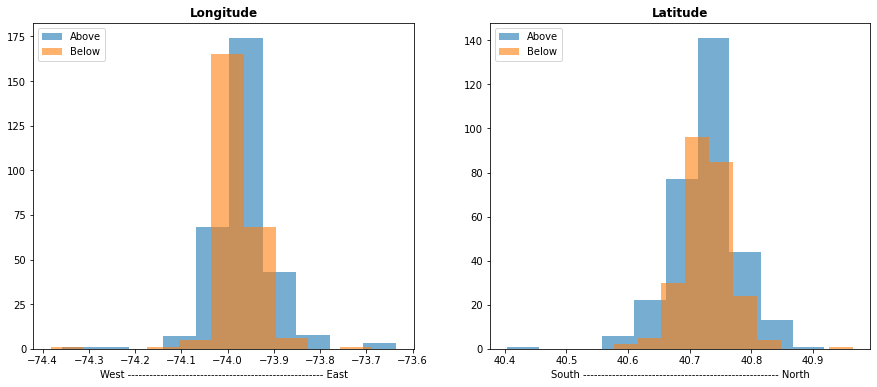

In [35]:
# Create a matplotlib subplot with 1 row and 2 columns
# YOUR CODE HERE
fig, ax = plt.subplots(1,2, figsize=(15,6))

# Plot a histogram of above average longitude
# on the first subplot axis. Set alpha to .6
# Set label to the string "Above"
# YOUR CODE HERE
ax[0].hist(abv_avg_lon, alpha=0.6)
#ax[0].set_xlabel("Above", weight = 'bold')

# Plot a histogram of below average longitude
# on the first subplot axis. Set alpha to .6
# Set label to the string "Below"
# YOUR CODE HERE
ax[0].hist(blw_avg_lon, alpha=0.6)
#ax[0].set_xlabel("Below", weight = 'bold')

# Set the title for the first subplot axis
# to the string "Longitude"
# YOUR CODE HERE
ax[0].set_title("Longitude", weight = 'bold')
ax[0].legend(["Above", "Below"], loc=2);
ax[0].set_xlabel("West ------------------------------------------------------ East")

# Plot a histogram of above average latitude
# on the second subplot axis. Set alpha to .6
# Set label to the string "Above"
# YOUR CODE HERE
ax[1].hist(abv_avg_lat, alpha=0.6)
#ax[1].set_xlabel("Above", weight = 'bold')

# Plot a histogram of below average latitude
# on the second subplot axis. Set alpha to .6
# Set label to the string "Below"
# YOUR CODE HERE
ax[1].hist(blw_avg_lat, alpha=0.6)
#ax[1].set_xlabel("Below", weight = 'bold')

# Set the title for the second subplot axis
# to the string "Latitude"
# YOUR CODE HERE
ax[1].set_title("Latitude", weight = 'bold')
ax[1].legend(["Above", "Below"], loc=2);
ax[1].set_xlabel("South ------------------------------------------------------ North")

In [36]:
#Added code to check on correlation coefficient for 247 longitude data points for above and below average restaurants
print("The correlation coefficient for the first 247 above and below restaurants' longitude is:",np.corrcoef(abv_avg_lon[0:247], blw_avg_lon[0:247])[0,1])

The correlation coefficient for the first 247 above and below restaurants' longitude is: -0.026771693994001877


In [37]:
#Added code to check on correlation coefficient for 247 latitude data points for above and below average restaurants
#Note at position 220 is an outlier for a above average restaurant which if included skews the correlation to above 0.05
print("The correlation coefficient for the first 219 above and below restaurants' latitude is:",np.corrcoef(abv_avg_lat[0:219], blw_avg_lat[0:219])[0,1])
print("The correlation coefficient for the first 247 above and below restaurants' latitude is:",np.corrcoef(abv_avg_lat[0:247], blw_avg_lat[0:247])[0,1])

The correlation coefficient for the first 219 above and below restaurants' latitude is: -0.005593788572096454
The correlation coefficient for the first 247 above and below restaurants' latitude is: 0.05176334617213501


In [38]:
#Added code to check on means for longitude and latitude for above and below restaurants
import statistics
print("The mean longitude for above average restaurants is:",statistics.mean(abv_avg_lon))
print("The mean latitude for above average restaurants is:",statistics.mean(abv_avg_lat))
print("The mean longitude for below average restaurants is:",statistics.mean(blw_avg_lon))
print("The mean latitude for below average restaurants is:",statistics.mean(blw_avg_lat))

The mean longitude for above average restaurants is: -73.96787728751275
The mean latitude for above average restaurants is: 40.72544361701399
The mean longitude for below average restaurants is: -73.97721755217
The mean latitude for below average restaurants is: 40.72914576917321


**Interpret the above visualization. How does it relate to your client's claims?**

YOUR ANSWER HERE

**Analysis:** Our client want to confirm their information that the above average restaurants are usually further east and below average are usually further west and that the biggest difference is whether the restaurant is on the north or south side. The observations from the graph include:

- The restaurants located most to the East and South are above average restaurants but these resturants are outliers to the bulk of the data; 

- The restaurants located most to the West and North are below average restaurants and are also outliers to the bulk of the data;

- The majority of the below average restaurant data has more western longitude readings than above average restaurants; 

- To a lesser extent the below average restaurant data has more southern latitude readings than above average restaurants; and

- The bulk of the data for above and below average rating restaurants exhibit a similar distribution.

The data supports the clients’ assertion that above average restaurants are further west but contrasts with the assertion that the north south difference is a bigger difference - it is not.

Of note from other analysis, the mean for the above average restaurants is 890 metres* to the south east of the below average mean and more to the East than to the South which supports the data from the graph. 

*Reference:https://gps-coordinates


## Find the most common zipcode for above average restaurants

In the cell below, loop over the restaurants in the above average dataset and count the frequency of the restaurants zipcode.

In [39]:
#added code to find below average zipcodes

blw_avg_zip_cnts = {}
zipcodes = []

for restaurant in below_average:
    location = isolate_values(below_average,('location'))
    
    zipcodes = isolate_values(location,('zip_code'))
zipcodes
    
for index in zipcodes:
    blw_avg_zip_cnts[index] = blw_avg_zip_cnts.setdefault(index, 0) + 1
    
dict(sorted(blw_avg_zip_cnts.items(), key=lambda item: item[1]))
       
      

{'10044': 1,
 '11415': 1,
 '10005': 1,
 '10065': 1,
 '10282': 1,
 '11101': 1,
 '10270': 1,
 '10280': 1,
 '11225': 1,
 '10451': 1,
 '10710': 1,
 '07928': 1,
 '11212': 1,
 '11215': 1,
 '07650': 1,
 '10461': 1,
 '10119': 1,
 '11209': 1,
 '11220': 1,
 '10031': 1,
 '07094': 1,
 '11203': 1,
 '11377': 1,
 '11236': 1,
 '11103': 1,
 '11224': 1,
 '10080': 1,
 '10314': 1,
 '11106': 1,
 '11218': 1,
 '11040': 1,
 '11378': 2,
 '07030': 2,
 '10006': 2,
 '11206': 2,
 '11232': 2,
 '10128': 2,
 '11238': 2,
 '11104': 2,
 '10004': 2,
 '11226': 2,
 '11385': 2,
 '10029': 2,
 '10075': 2,
 '10025': 3,
 '11217': 3,
 '10024': 3,
 '10038': 3,
 '11222': 3,
 '11207': 3,
 '11231': 3,
 '11216': 3,
 '11237': 3,
 '11205': 4,
 '10017': 4,
 '10007': 4,
 '10036': 4,
 '07302': 4,
 '10001': 4,
 '10018': 5,
 '10016': 5,
 '11249': 5,
 '11221': 5,
 '10023': 5,
 '10021': 5,
 '10028': 6,
 '10019': 6,
 '11211': 7,
 '10022': 7,
 '10012': 7,
 '10011': 8,
 '10002': 8,
 '10009': 8,
 '10014': 8,
 '10013': 8,
 '10010': 9,
 '11201': 13

In [40]:
# Create an empty dictionary
# This dictionary will hold the counts
# for each zipcode
abv_avg_zip_cnts = {}
zipcodes = []

# Loop over the above average dataset
# YOUR CODE HERE
for restaurant in above_average:
    location = isolate_values(above_average,('location'))
    #for location in restaurant['location']:
     #   for zipcodes in location['zip_code']:
    
    # Isolate the restaurant's zipcode 
    # YOUR CODE HERE
    zipcodes = isolate_values(location,('zip_code'))
zipcodes
    
    # Check if the zipcode is a key in the dictionary
    # YOUR CODE HERE

for index in zipcodes:
    abv_avg_zip_cnts[index] = abv_avg_zip_cnts.setdefault(index, 0) + 1
    
dict(sorted(abv_avg_zip_cnts.items(), key=lambda item: item[1]))
        
        # Add one to the zipcode's value
        # YOUR CODE HERE
    
    # If the zipcode is not a key
    # add it to the dictionary with a value of 1
    # YOUR CODE HERE

{'10028': 1,
 '11102': 1,
 '11249': 1,
 '10010': 1,
 '10128': 1,
 '76542': 1,
 '11373': 1,
 '10032': 1,
 '10038': 1,
 '10021': 1,
 '10030': 1,
 '11418': 1,
 '10035': 1,
 '11220': 1,
 '07020': 1,
 '07305': 1,
 '11050': 1,
 '10454': 1,
 '07901': 1,
 '10270': 1,
 '11375': 1,
 '10302': 1,
 '07732': 1,
 '10034': 1,
 '10301': 1,
 '11214': 1,
 '11432': 1,
 '11694': 1,
 '07042': 1,
 '10464': 1,
 '10112': 1,
 '11203': 1,
 '07002': 1,
 '11692': 1,
 '11224': 1,
 '11234': 1,
 '11561': 1,
 '10005': 1,
 '10705': 1,
 '10305': 1,
 '10304': 1,
 '11225': 1,
 '07304': 1,
 '11542': 1,
 '10075': 2,
 '10006': 2,
 '11218': 2,
 '10029': 2,
 '11233': 2,
 '07302': 2,
 '10004': 2,
 '11207': 2,
 '10461': 2,
 '07094': 2,
 '11212': 2,
 '07087': 2,
 '11219': 2,
 '07307': 2,
 '11213': 2,
 '11379': 2,
 '07010': 2,
 '11206': 2,
 '10023': 3,
 '11238': 3,
 '10065': 3,
 '11104': 3,
 '11221': 3,
 '10027': 3,
 '11103': 3,
 '11385': 3,
 '10036': 3,
 '10007': 3,
 '11421': 3,
 '11378': 3,
 '11216': 3,
 '10458': 3,
 '10025': 3,

Run the next cell unchanged to test your work!
> If the below cell runs without throwing an error, your code is likely correct!

In [41]:
assert type(abv_avg_zip_cnts) == dict
assert len(abv_avg_zip_cnts) == 104 or len(abv_avg_zip_cnts) == 103
assert '10012' in abv_avg_zip_cnts

Now loop over the `abv_avg_zip_cnts` dictionary and find the zipcode with the largest count. 

For this question, there are multiple ways to find the solution. Comments have not been provided.

In [42]:
# Your code here
maximum = 0
max_key = None

for k in abv_avg_zip_cnts:
    if abv_avg_zip_cnts[k] > maximum:
        maximum = abv_avg_zip_cnts[k]
        max_key = k

print("The zipcode with the highest count is", max_key, "with" , maximum, "restaurants located here.")

The zipcode with the highest count is 10014 with 13 restaurants located here.


**Interpret the results. How does the most frequent zipcode relate to your client's claims?**

YOUR ANSWER HERE

**Analysis:** Our client believes that the 10012 zipcode in New York City is the best place to open a restaurant as they believe this location has the most above average rating restaurants in NYC. 

However, this is not correct as the neighbouring* zipcode 10014 has 3 more above average rating restaurants in its location than zipcode 10012. 

If our client wants to locate their restaurants in close proximity to other highly rated restaurants, they would choose preferentially the following zipcodes based on this data:

- 10014 (location of 13 above average restaurants); 

- 11211 (location of 11 above average restaurants); and  

- 10012 or 10003 (each a location of 10 above average restaurants).

Of note with regard to our clients’ assertion that above average restaurants are usually further east, the zipcode 11211 is the most eastern* of all the top zipcode locations outlined above. 

*Ref: https://www.unitedstateszipcodes.org


## Compile your findings into a report

You have address all of your client's claims! In the cell below, describe the findings of your analysis.

YOUR ANSWER HERE

# Report for Pizza Restaurant Client

## Summary

Data analysis reveals an above average Yelp rating object for the new pizza restaurant in New York City (NYC) is 4.5 or above. The strategies to increase review counts and prices to increase ratings and locate the restaurant in zip code 10012 are not supported by data analysis although an eastern location may be appropriate. 
The author acknowledges that though the variables of review counts, prices and location may be correlated with higher ratings, these are not causative factors as other aspects will influence ratings. 

## Objective

Our client is opening a pizza restaurant in NYC and wants to ensure this restaurant has an above average Yelp rating. In order to assist our client, Yelp data from 1000 NYC pizza restaurants has been analysed. 
Our client’s requirements with regard to NYC Pizza restaurants (restaurants) are listed below along with the relevant data analysis findings.

## Yelp ratings for NYC pizza restaurants

The average rating from the data was ‘4’ which is higher than the client’s expectation of ‘3’.  Data analysis revealed:
-	306 restaurants rated equal to or higher than 4.5 (referred to as ‘above average ratings’); 
-	247 restaurants rated equal to or lower than 3.5 (referred to as ‘below average ratings’); and 
-	447 restaurants rated between 3.5 and 4.5.

In order to receive an above average Yelp rating, a rating of 4.5 or above is required for the new restaurant.

## Rating results for high review counts and whether to maximise

The mean review count for below rating restaurants is higher than that for above average ratings which contrasts with the client belief that restaurants with a high review count seem to be quite successful. 
According to this data, the average review counts for the above and below average rating are:

-	below average rating restaurants median of approximately 286 reviews; and
-	above average rating restaurants median of approximately 189 reviews.

The data does not show a relationship between high review counts and higher average ratings therefore the strategy to focus on maximizing review counts to receive a higher rating is not endorsed.

## The most common price point for above average ratings

The analysis for the most common price point revealed the following:
-	the most common price point for above average rating restaurants is 'unknown';
-	the second most common price point for above (and below average) rating restaurants is two dollar signs; and
-	the third most common price point for above average rating restaurants is one dollar sign and closely follows the 2 dollar sign price point.

This data appears to contrast with the client's belief that most above average restaurants have the higher price point and therefore they should consider not increasing their prices to $$ as this does not match the majority of above average restaurants in this data and given the most common price point is unknown. 

## Location of above average rating restaurants

**Longitude/Latitude:** In order to assess if above average restaurants are located further east and south than below average restaurants, longitude and latitude data analysis was conducted with the following findings:

- The majority of above and below average rating restaurants exhibit a similar location distribution with above average restaurants having a larger spread of locations;
-	The majority of the below average restaurants have more western longitude readings than above average restaurants; 
-	To a lesser extent the below average restaurant data has more southern latitude readings than above average restaurants;
-	Above average restaurants are located in the furthest East and South locations but these locations differ from most other data points; and
-	Below average restaurants are located in the furthest West and North locations but these locations also differ from most other data points.

The data provides weak support for the client’s assertion that above average restaurants are located further east and does not support the assertion that the north south difference is a bigger difference.

**Zip code:** The following zip codes are the top five zip code locations for above average rating restaurants with the location number of below average restaurants provided for comparison:
-	Zip code location of 10014: location of 13 Above Average & 8 Below average restaurants
-	Zip code location of 11211: location of 11 Above Average & 7 Below average restaurants
-	Zip code location of 10012: location of 10 Above Average & 7 Below average restaurants
-	Zip code location of 10003: location of 10 Above Average & 14 Below average restaurants
-	Zip code location of 10013: location of 9 Above Average & 8 Below average restaurants

With note regarding whether above average restaurants are usually further east, the zip code 11211 is the most eastern of all the top zip code locations and is the second highest location for above average ratings. 
If the zip code of 10014 is chosen, this is the location of the highest concentration of above average rating restaurants and the fifth highest location for below average rating restaurants. 

## Limitations of this analysis

The data consists of various outliers which likely has the following effect:
- the average rating negatively and is likely higher than ‘4’;
- the average review count positively and is likely lower for both above and below average rating restaurants;
- altering of the longitude and latitude location analysis; 

This dataset may not be best representative of NYC pizza restaurants in size or in recency and the client should consider other datasets being analysed prior to final strategy decisions.

Given the significant number of 'unknown' price points, further data collection and analysis should be considered.

As outlined above correlation of different data above does not necessarily mean causation, that is, higher review counts, higher prices and location do not necessarily result in a higher Yelp rating. 

*End of report*


# Summary

Well done! As you can see, manipulating nested data stuctures can be a challenging task. Pulling information from json objects requires a thoughtful inspection of how the data is organized, and code that allows you to avoid repetition.